In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
w_api_key = "d7c7dccbd0e9c944b724480c6c41935b"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [12]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


In [13]:
# Perform API Calls
print("Data Retrieval ")
print("----")

w_api_key = "d7c7dccbd0e9c944b724480c6c41935b"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Cont. to Skip")
        
print("----------------")
print("Data Complete")
print("----------------")
        

Data Retrieval 
----
Processing Record 1 of Set 1 : carnarvon
Processing Record 2 of Set 1 : salalah
Processing Record 3 of Set 1 : badalona
Processing Record 4 of Set 1 : yellowknife
City not found. Cont. to Skip
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : cabo san lucas
Processing Record 7 of Set 1 : atuona
Processing Record 8 of Set 1 : huarmey
Processing Record 9 of Set 1 : butaritari
Processing Record 10 of Set 1 : katsuura
Processing Record 11 of Set 1 : havoysund
Processing Record 12 of Set 1 : nishihara
Processing Record 13 of Set 1 : sesheke
Processing Record 14 of Set 1 : souillac
Processing Record 15 of Set 1 : marzuq
Processing Record 16 of Set 1 : qaanaaq
Processing Record 17 of Set 1 : hithadhoo
Processing Record 18 of Set 1 : tashla
Processing Record 19 of Set 1 : ligatne
Processing Record 20 of Set 1 : rikitea
Processing Record 21 of Set 1 : bluff
Processing Record 22 of Set 1 : busselton
Processing Record 23 of Set 1 : mataura
Processing Recor

Processing Record 29 of Set 4 : faanui
Processing Record 30 of Set 4 : rocha
Processing Record 31 of Set 4 : isla mujeres
Processing Record 32 of Set 4 : akyab
Processing Record 33 of Set 4 : les cayes
Processing Record 34 of Set 4 : tres arroyos
City not found. Cont. to Skip
Processing Record 35 of Set 4 : maniitsoq
Processing Record 36 of Set 4 : atar
Processing Record 37 of Set 4 : byron bay
Processing Record 38 of Set 4 : bethel
City not found. Cont. to Skip
Processing Record 39 of Set 4 : grindavik
City not found. Cont. to Skip
Processing Record 40 of Set 4 : odweyne
Processing Record 41 of Set 4 : port macquarie
Processing Record 42 of Set 4 : dunedin
City not found. Cont. to Skip
Processing Record 43 of Set 4 : haines junction
Processing Record 44 of Set 4 : goderich
Processing Record 45 of Set 4 : arraial do cabo
Processing Record 46 of Set 4 : omsukchan
Processing Record 47 of Set 4 : klaksvik
Processing Record 48 of Set 4 : bathsheba
Processing Record 49 of Set 4 : joshimath


Processing Record 18 of Set 8 : bago
Processing Record 19 of Set 8 : carbonia
Processing Record 20 of Set 8 : birao
City not found. Cont. to Skip
Processing Record 21 of Set 8 : dolores
Processing Record 22 of Set 8 : hervey bay
Processing Record 23 of Set 8 : hanzhong
Processing Record 24 of Set 8 : kattivakkam
Processing Record 25 of Set 8 : suslovo
Processing Record 26 of Set 8 : baytown
Processing Record 27 of Set 8 : saint-francois
Processing Record 28 of Set 8 : bamiantong
Processing Record 29 of Set 8 : maloy
Processing Record 30 of Set 8 : avera
Processing Record 31 of Set 8 : hanyang
Processing Record 32 of Set 8 : severnoye
Processing Record 33 of Set 8 : igrim
Processing Record 34 of Set 8 : changji
Processing Record 35 of Set 8 : korla
Processing Record 36 of Set 8 : murillo
Processing Record 37 of Set 8 : halifax
Processing Record 38 of Set 8 : prieska
Processing Record 39 of Set 8 : sao filipe
City not found. Cont. to Skip
Processing Record 40 of Set 8 : brigantine
Proces

In [14]:
 #Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [15]:
 #Count weather data
weather_data.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Clouds        549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [16]:
#Display dataframe
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,91.40,14,0,12.75,AU,1607306694
1,Salalah,17.02,54.09,73.40,73,40,3.36,OM,1607306694
2,Badalona,41.45,2.25,48.00,70,0,10.29,ES,1607306694
3,Yellowknife,62.46,-114.35,17.60,92,90,5.82,CA,1607306464
4,Ushuaia,-54.80,-68.30,50.00,93,75,12.75,AR,1607306694
5,Cabo San Lucas,22.89,-109.91,71.60,56,5,8.05,MX,1607306694
6,Atuona,-9.80,-139.03,78.57,76,6,15.73,PF,1607306694
7,Huarmey,-10.07,-78.15,67.08,84,100,6.58,PE,1607306695
8,Butaritari,3.07,172.79,81.03,79,16,13.62,KI,1607306695
9,Katsuura,35.13,140.30,59.00,62,20,3.36,JP,1607306695


In [17]:
#Save weather data to a cities csv file
weather_data.to_csv("output_data_cities.csv", index=False)

In [18]:
#_______FILTER OUT DATA 
#humidity is less than 100


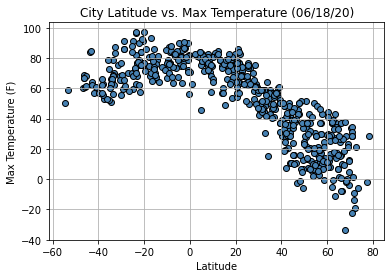

In [19]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig('LatvsMaxTemp')

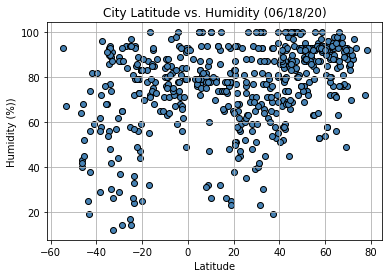

In [20]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig('CityLatvsHumidity')

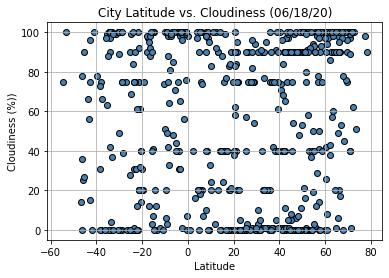

In [21]:
#Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig ('CityLatvsCloud')

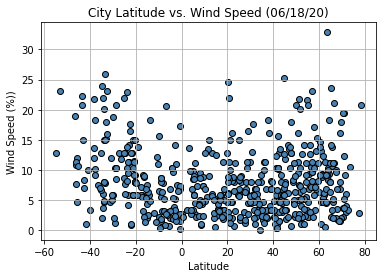

In [22]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig ('CityLatvsWind')

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0, :]

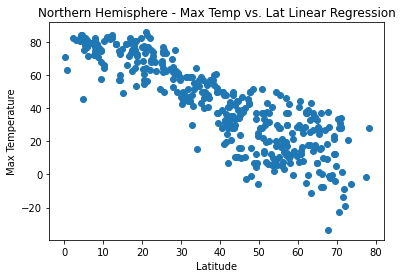

In [28]:
#Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Lat Linear Regression')
plt.show()


In [29]:
plt.savefig('NMaxTempvsLat')

<Figure size 432x288 with 0 Axes>

Regression line equation is: y = 0.37x + 80.39


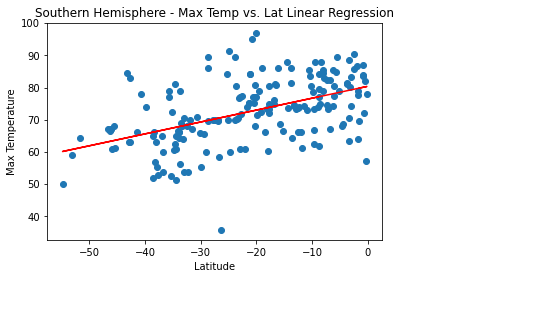

<Figure size 432x288 with 0 Axes>

In [83]:
#Southern Hemisphere 
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Lat Linear Regression')
plt.show()
plt.savefig('N_MaxTempvsLat')

Regression line equation is: y = 0.24x + 68.25


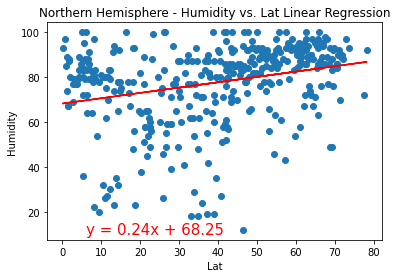

<Figure size 432x288 with 0 Axes>

In [84]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Lat Linear Regression')
plt.show()
plt.savefig('N_HumidityvsLat')

Regression line equation is: y = 0.47x + 82.45


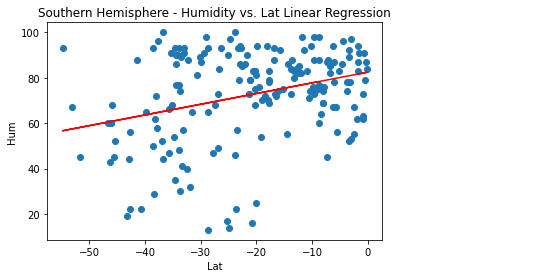

<Figure size 432x288 with 0 Axes>

In [85]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Hum')
plt.title('Southern Hemisphere - Humidity vs. Lat Linear Regression')
plt.show()
plt.savefig('S_MaxTempvsLat')

Regression line equation is: y = 0.44x + 38.12


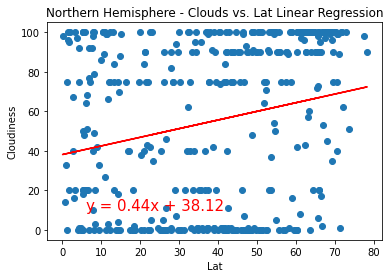

<Figure size 432x288 with 0 Axes>

In [86]:
 #Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Clouds vs. Lat Linear Regression')
plt.show()
plt.savefig('N_CloudvsLat')

Regression line equation is: y = 0.47x + 64.72


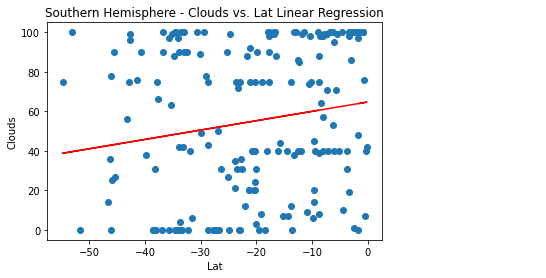

<Figure size 432x288 with 0 Axes>

In [87]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Clouds')
plt.title('Southern Hemisphere - Clouds vs. Lat Linear Regression')
plt.show()
plt.savefig('S_CloudvsLat')    

Regression line equation is: y = 0.04x + 6.23


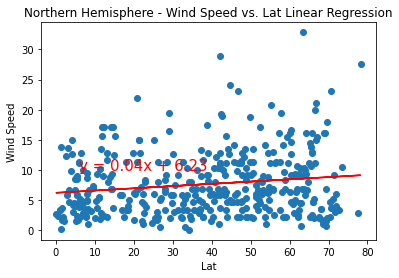

<Figure size 432x288 with 0 Axes>

In [88]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Lat Linear Regression')
plt.show()
plt.savefig('N_WindvsLat')

Regression line equation is: y = -0.16x + 5.05


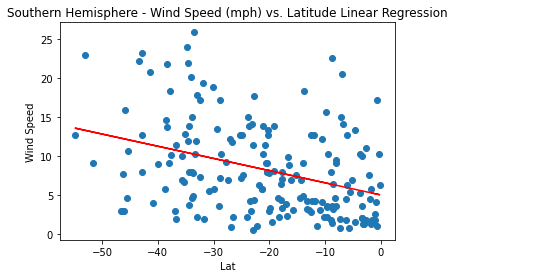

<Figure size 432x288 with 0 Axes>

In [89]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig('S_WindvsLat')